### Data Sampling

Data  sampling  provides  a  collection  of  techniques  that  transform  a  training  dataset  inorder to balance or better balance the class distribution.  Once balanced, standard machine learning algorithms can be trained directly on the transformed dataset without any modification.This  allows  the  challenge  of  imbalanced  classification,  even  with  severely  imbalanced  class distributions, to be addressed with a data preparation method.

 In this tutorial, you will discover a suite of data sampling techniques that can be used to balance an imbalanced classification dataset.  After completing this tutorial, you willknow:
 
 - The challenge of machine learning with imbalanced classification datasets.
 - The balancing of skewed class distributions using data sampling techniques.
 - Tour of data sampling methods for oversampling, undersampling, and combinations ofmethods
 
### Problem with Imbalance learning

*The hitch with imbalanced datasets is that standard classification learning algorithms are often biased towards the majority classes (known as “negative”) and therefore there is a higher misclassification rate in the minority class instances (called the “positive” class).*— Page 79,Learning from Imbalanced Data Sets, 2018

### Balance the Class Distribution with sampling

The reason that sampling methods are so common is because they are simple to understandand implement, and because once applied to transform the training dataset, a suite of standard machine learning algorithms can then be used directly.  This means that any from tens or hundreds of machine learning algorithms developed for balanced (or mostly balanced) classification can then be fit on the training dataset without any modification adapting them for the imbalance in observations.

*Some models use prior probabilities, such as naive Bayes and discriminant analysisclassifiers.  Unless specified manually, these models typically derive the value of thepriors from the training data.  Using more balanced priors or a balanced training setmay help deal with a class imbalance.*— Page 426,Applied Predictive Modeling, 2013

Sampling is only performed on the training dataset, the dataset used by an algorithm to learn a model.  It is not performed on the holdout test or validation dataset.  The reason is that the intent is not to remove the class bias from the model fit but to continue to evaluate the resulting model on data that is both real and representative of the target problem domain.As such, we can think of data sampling methods as addressing the problem of relative class imbalanced in the training dataset, and ignoring the underlying cause of the imbalance in the problem domain.  This is the difference between so-called relative and absolute rarity of examples in a minority class.

There are two main types of data sampling used on the training dataset:  oversampling and undersampling.  In the next section, we will take a tour of popular methods from each type, as well as methods that combine multiple approaches.

The following sections review some of the more popular methods, described in the context of binary (two-class) classification problems, which is a common practice, although most can be used directly or adapted for imbalanced classification with more than two classes.  The list here is based mostly on the approaches available in the scikit-learn friendly library, called imbalanced-learn.  For a longer list of data sampling methods, see Chapter 5 Data Level Preprocessing Methods in the 2018 book Learning from Imbalanced Data Sets.

### Oversampling Techniques

- Random Oversampling
- Synthetic Minority Oversampling Technique (SMOTE)
- Borderline-SMOTE
- Borderline Oversampling with SVM
- Adaptive Synthetic Sampling (ADASYN)


 The  simplest  oversampling  method  involves randomly duplicating examples from the minority class in the training dataset, referred to as Random Oversampling.  

The most popular and perhaps most successful oversampling method is SMOTE; that is an acronym for Synthetic Minority Oversampling Technique.  SMOTE worksb y selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line.There are many extensions to the SMOTE method that aim to be more selective for the types  of  examples  in  the  minority  class  that  are  synthesized.   

Borderline-SMOTE  involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model, and only generating synthetic samples that are difficult to classify.

Borderline Oversampling is an extension to SMOTE that fits an SVM to the dataset and uses the decision boundary as defined by the support vectors as the basis for generating synthetic examples, again based on the idea that the decision boundary is the area where more minority examples are required.

Adaptive Synthetic Sampling (ADASYN) is another extension to SMOTE that generates synthetic samples inversely proportional to the density of the examples in the minority class.  It is designed to create synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.  For more on oversampling methods, see Chapter 12.

###  Undersampling Techniques

- Random Undersampling
- Condensed Nearest Neighbor Rule (CNN)
- Near Miss Undersampling
- Tomek Links Undersampling
- Edited Nearest Neighbors Rule (ENN)
- One-Sided Selection (OSS)
- Neighborhood Cleaning Rule (NCR)

 The simplest undersampling method involves randomly deleting examples from the majority class in the training dataset,  referred to as random undersampling.  One group of techniques involves selecting a robust and representative subset of the examples in the majority class.
 
The Condensed Nearest Neighbors rule, or CNN for short, was designed for reducing the memory required for the k-nearest neighbors algorithm.It works by enumerating the examples in the dataset and adding them to the store only if they cannot be classified correctly by the current contents of the store, and can be applied to reduce the number of examples in the majority class after all examples in the minority class have been added to the store.

Near Miss refers to a family of methods that use KNN to select examples from the majority class.   NearMiss-1 selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class.  NearMiss-2 selects examples from the majority class that have the smallest average distance to the three furthest examples fromthe minority class.  NearMiss-3 involves selecting a given number of majority class examples for each example in the minority class that are closest.

Another group of techniques involves selecting examples from the majority class to delete.These approaches typically involve identifying those examples that are challenging to classify and therefore add ambiguity to the decision boundary.  Perhaps the most widely known deletion undersampling  approach  is  referred  to  as  Tomek  Links,  originally  developed  as  part  of  an extension to the Condensed Nearest Neighbors rule.  A Tomek Link refers to a pair of examples in the training dataset that are both nearest neighbors (have the minimum distance in feature space) and belong to different classes.  **Tomek Links are often misclassified examples found along the class boundary and the examples in the majority class are deleted.**

The  Edited  Nearest  Neighbors  rule,  or  ENN  for  short,  is  another  method  for  selecting examples for deletion.  This rule involves using k= 3 nearest neighbors to locate those examples in a dataset that are misclassified and deleting them.  The ENN procedure can be repeated multiple times on the same dataset, better refining the selection of examples in the majority class.  This extension is referred to initially as unlimited editing although it is more commonly referred to as Repeatedly Edited Nearest Neighbors.  Staying with the select to keepv s.select to delete families of undersampling methods, there are also undersampling methods that combine both approaches.

One-Sided Selection, or OSS for short, is an undersampling technique combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule.  The Tomek Links method is used to remove noisy examples on the class boundary, whereas CNN is used to remove redundant examples from the interior of the density of the majority class.  The Neighborhood Cleaning Rule, or NCRfor short, is another combination undersampling technique that combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples and the Edited Nearest Neighbors(ENN) Rule to remove noisy or ambiguous examples. 

### Combination of techniques

Experiments have shown that applying both types of techniques together can often result in better overall performance of a model fit on the resulting transformed dataset.  Some of the more widely used and implemented combinations of data sampling methods include:

- SMOTE and Random Undersampling
- SMOTE and Tomek Links
- SMOTE and Edited Nearest Neighbors Rule


 SMOTE is perhaps the most popular and widely used oversampling technique.  It is common to pair SMOTE with an undersampling method that selects examples from the dataset to delete, and the procedure is applied to the dataset. after SMOTE, allowing the editing step to be applied to both the minority and majority class.
The intent is to remove noisy points along the class boundary from both classes, which seems to have the effect of the better performance of classifiers fit on the transformed dataset.

Two popular examples involve using SMOTE followed by the deletion of Tomek Links, and SMOTE followed by the deletion of those examples misclassified via a KNN model, the so-called Edited Nearest Neighbors rule.  For more on combining oversampling and under sampling methods, see Chapter 14.

### Random Oversampling

Random oversampling involves randomly duplicating examples from the minority class and  adding them to the training dataset.  Examples from the training dataset are selected randomly with replacement.  This means that examples from the minority class can be chosen and added to the new more balanced training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or replaced in the original dataset, allowing them to be selected again.


This technique can be effective for those machine learning algorithms that are affected by a skewed distribution and where multiple duplicate examples for a given class can influence the fit of the model.  This might include algorithms that iteratively learn coefficients, like artificialneural networks that use stochastic gradient descent.  It can also affect models that seek goodsplits of the data, such as support vector machines and decision trees.

It might be useful to tune the target class distribution.  In some cases, seeking a balanced distribution  for  a  severely  imbalanced  dataset  can  cause  affected  algorithms  to  overfit  the minority class, leading to increased generalization error.  The effect can be better performance on the training dataset, but worse performance on the holdout or test dataset.

The increase in the number of examples for the minority class, especially if the class skew was severe, can also result in a marked increase in the computational cost when fitting the model, especially considering the model is seeing thesame examples in the training dataset again and again

As such, to gain insight into the impact of the method, it is a good idea to monitor the performance on both train and test datasets after oversampling and compare the results to the same algorithm on the original dataset.  

Random oversampling can be implemented using the `RandomOverSamplerclass`.  The class can be defined and takes a sampling strategy argument that can be set to ‘minority’ to automatically balance the minority class with majority class or classes. 





In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

X, y = make_classification(n_samples=10_000, weights=[0.99], flip_y=0)
print('original', Counter(y))

# define oversampling strategy
oversample_eq = RandomOverSampler(sampling_strategy='minority')
oversample_mid = RandomOverSampler(sampling_strategy=0.5)

# fit and apply the transfor
X_over, y_over = oversample_eq.fit_resample(X, y)
print('equal', Counter(y_over))
X_over, y_over = oversample_mid.fit_resample(X, y)
print('50pc', Counter(y_over))

original Counter({0: 9900, 1: 100})
equal Counter({0: 9900, 1: 9900})
50pc Counter({0: 9900, 1: 4950})


This transform can be used as part of a Pipeline to ensure that it is only applied to the training dataset as part of each split in a k-fold cross-validation.  A traditional scikit-learn Pipeline cannot be used; instead, a Pipeline from the imbalanced-learn library can be used.

 Your specific results may differ given the stochastic nature of the dataset and the sampling strategy.

In [24]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

random_state = np.random.RandomState(seed= 1)

X, y = make_classification(n_samples=1000, weights=[0.99], flip_y=0, random_state=random_state)
# define pipeline

steps = [
    ('over', RandomOverSampler(sampling_strategy='minority', random_state=random_state)),
    ('model', DecisionTreeClassifier())
]

pipeline = Pipeline(steps)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, 
                                random_state=random_state)

scores = cross_val_score(estimator= pipeline, cv = kfold, n_jobs=-1,
                         X=X, y=y, scoring='f1_micro')

print('f-measure', np.mean(scores))

f-measure 0.9806666666666667


### Random Undersampling

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.  This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset.  This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.

**This approach may be more suitable for those datasets where there is a class imbalance although still a sufficient number of examples in the minority class, such that a useful model can be fit.**

A limitation of undersampling is that examples from the majority class are deleted that may be useful, important, or perhaps critical to fitting a robust decision boundary.  Given that  examples  are  deleted  randomly,  there  is  no  way  to  detect  or  preserve good or  more information-rich examples from the majority class.


The random undersampling technique can be implemented using the `RandomUnderSampler` imbalanced-learn class.  The class can be used just like the `RandomOverSampler` class in the previous section, except the strategies impact the majority class instead of the minority class.For example, setting the sampling strategy argument to ‘majority’ will undersample the majority class determined by the class with the largest number of examples.

In [17]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


###  Synthetic Minority Oversampling Technique

An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class.  This is a type of data augmentation for tabular data and can be very effective.

Perhaps the most widely used approach to synthesizing new examples is called the SyntheticMinority Oversampling TEchnique, or SMOTE for short.  This technique was described by Nitesh Chawla, et al.  in their 2002 paper named for the technique titled SMOTE: Synthetic Minority Over-sampling Technique.  SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen.  Then k of the nearest neighbors for that example are found (typically k= 5).  A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

This procedure can be used to create as many synthetic examples for the minority class as are required.  As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.

A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes. 



original Counter({0: 9900, 1: 100})
over Counter({0: 9900, 1: 9900})


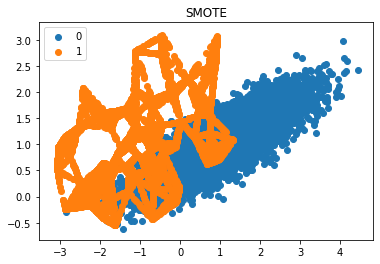

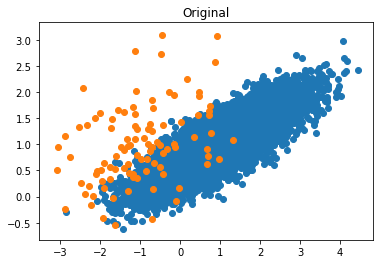

In [51]:
# Oversample and plot imbalanced dataset with SMOTE
%matplotlib inline
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print('original', counter)
# transform the dataset
oversample = SMOTE(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)
# summarize the new class distribution
counter_over = Counter(y_over)
print('over', counter_over)
# scatter plot of examples by class label
for label in counter_over.keys():
    row_ix = where(y_over == label)[0]
    pyplot.title('SMOTE')
    pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

for label in counter.keys():
    row_ix = where(y == label)[0]
    pyplot.title('Original')
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))

### SMOTE for classification

The algorithm is defined with any required hyperparameters (we will use the defaults), then we will use repeated stratified k-fold cross-validation to evaluate the model.  We will use three repeats of 10-fold cross-validation, meaning that 10-fold cross-validation is applied three times fitting and evaluating 30 models on the dataset.

The algorithm is defined with any required hyperparameters (we will use the defaults), then we will use repeated stratified k-fold cross-validation to evaluate the model.  We will use three repeats of 10-fold cross-validation, meaning that 10-fold cross-validation is applied three times fitting and evaluating 30 models on the dataset.


In [37]:
#decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], 
                           flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', 
                         cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.762


Now, we can try the same model and the same evaluation method, although use a SMOTE transformed  version  of  the  dataset.

In [38]:
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.816


We can see a modest improvement in performance from a ROC AUC of about 0.77 to about 0.83.

### SMOTE Hyperparameter tunning

You  could  explore  testing  different  ratios  of  the  minority  class  and  majority  class  (e.g.changing the samplingstrategy argument) to see if a further lift in performance is possible. Another area to explore would be to test different values of the k-nearest neighbors selected in the SMOTE procedure when each new synthetic example is created.  The default is k= 5,although larger or smaller values will influence the types of examples created, and in turn, may impact the performance of the model.

In [42]:
# grid search k value for SMOTE oversampling for imbalanced classification
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = np.arange(1,8)
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    pipeline = Pipeline(steps=[('over', over), ('model', model)])
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.772
> k=2, Mean ROC AUC: 0.795
> k=3, Mean ROC AUC: 0.806
> k=4, Mean ROC AUC: 0.808
> k=5, Mean ROC AUC: 0.806
> k=6, Mean ROC AUC: 0.817
> k=7, Mean ROC AUC: 0.820



Running the example will perform SMOTE oversampling with different k values for the KNN used in the procedure, followed by fitting a decision tree on the resulting training dataset.The mean ROC AUC is reported for each configuration.Again the stochastic nature of the sampling may lead to different results. 

### SMOTE With Selective Sample Generation

We can be selective about the examples in the minority class that are oversampled using SMOTE. In this section, we will review some extensions to SMOTE that are more selective regarding the examples from the minority class that provide the basis for generating new synthetic examples.

#### Borderline-SMOTE

A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model.  We can then oversample just those difficult instances, providing more resolution only where it may be required.

These examples that are misclassified are likely ambiguous and on the edge or border of the decision boundary where class membership may overlap.  As such, this modified to SMOTE is called Borderline-SMOTE and was proposed by Hui Han, et al.  in their 2005 paper titled Borderline-SMOTE:  A  New  Over-Sampling  Method  in  Imbalanced  Data  Sets  Learning.  The authors also describe a version of the method that also oversampled the majority class for those examples that cause a misclassification of borderline instances in the minority class.  This is referred to as Borderline-SMOTE1, 

We can implement Borderline-SMOTE1 using the BorderlineSMOTE class from imbalanced-learn.

Instead of generating new synthetic examples for the minority class blindly,we would expect the Borderline-SMOTE method to only create synthetic examples along the decision boundary between the two classes.  The complete example of using Borderline-SMOTE to oversample binary classification datasets is listed below.



Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


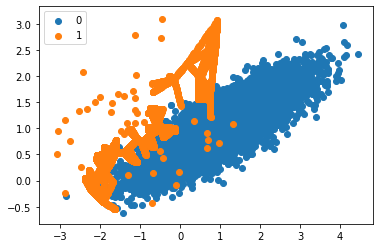

In [2]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
import numpy as np
%matplotlib inline
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label in counter.keys():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

The plot clearly shows the effect of the selective approach to oversampling.  Examples along the decision boundary of the minority class are oversampled intently (orange).  The plot shows that those examples far from the decision boundary are not oversampled.  This includes both examples that are easier to classify (those orange points toward the top left of the plot) and those that are overwhelmingly difficult to classify given the strong class overlap (those orange points toward the bottom right of the plot)

#### Borderline-Smote SVM

Hien Nguyen, et al.  suggest using an alternative to Borderline-SMOTE where a SVM algorithm is used instead of a KNN to identify misclassified examples on the decision boundary.

In addition to using an SVM, the technique attempts to select regions where there are fewer examples of the majority class and tries to extrapolate towards the class boundary.

his variation can be implemented via the SVMSMOTE class from the imbalanced-learn library.The example below demonstrates this alternative approach to Borderline SMOTE on the same imbalanced dataset.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


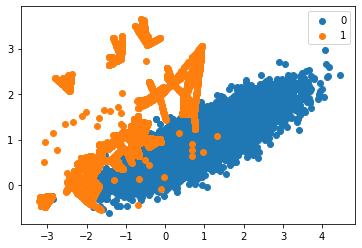

In [3]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###  Adaptive Synthetic Sampling (ADASYN)

ADASYN  is  based  on  the  idea  of  adaptively  generating  minority  data  samples according to their distributions:  more synthetic data is generated for minority class samples that are harder to learn compared to those minority samples that are easier to learn.—ADASYN: Adaptive synthetic sampling approach for imbalanced learning, 2008

The key idea of ADASYN algorithm is to use a density distribution as a criterion to automatically decide the number of synthetic samples that need to be generated for each minority data example.—ADASYN: Adaptive synthetic sampling approach for imbalanced learning, 2008

We can implement this procedure using the ADASYN class in the imbalanced-learn library

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


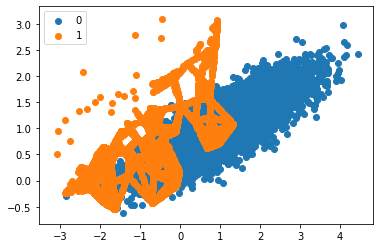

In [5]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

 Unlike Borderline-SMOTE, we can see that the examples that have the most class overlap have the most focus.  On problems where these low density examples might be outliers, the ADASYN approach may put too much attention on these areas of the feature space,which may result in worse model performance.  It may help to remove outliers prior to applying the oversampling procedure, and this might be a helpful heuristic to use more generally.

## Undersampling Methods

Most  of  the  attention  of  sampling  methods  for  imbalanced classification is put on oversampling the minority class.  Nevertheless, a suite of techniques has been developed for undersampling the majority class that can be used in conjunction with effective oversampling methods.

... undersampling,  that  consists  of  reducing  the  data  by  eliminating  examplesbelonging  to  the  majority  class  with  the  objective  of  equalizing  the  number  ofexamples of each class ...— Page 82,Learning from Imbalanced Data Sets, 2018

Here are many different types of undersampling techniques, although most can be grouped into those that select examples to keep in the transformed dataset, those that select examples to delete, and hybrids that combine both types of methods

Undersampling methods can be used directly on a training dataset that can then, in turn, be used to fit a machine learning model.  Typically, undersampling methods are used in conjunction with an oversampling technique for the minority class, and this combination often results in better performance than using oversampling or undersampling alone on the training dataset.

The  simplest  undersampling  technique  involves  randomly  selecting  examples  from  the majority class and deleting them from the training dataset.  This is referred to as random undersampling.  Although simple and effective, a limitation of this technique is that examples are removed without any concern for how useful or important they might be in determining the decision boundary between the classes.  This means it is possible, or even likely, that useful information will be deleted.
An extension of this approach is to be more discerning regarding the examples from the majority class that are deleted.  This typically involves heuristics or learning models that attempt to identify redundant examples for deletion or useful examples for non-deletion. 


#### Methods that Select Examples to Keep

The near-miss family of methods, and the popular condensed nearest neighbor rule

##### Near Miss Undersampling

Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.  The approaches were proposed by Jianping Zhang and Inderjeet Mani in their 2003 paper titled KNN Approach to Unbalanced
Data Distributions:  A Case Study Involving Information Extraction.  There are three versions ofthe technique, named NearMiss-1, NearMiss-2, and NearMiss-3.

- NearMiss-1:  Majority class examples with minimum average distance to three closest minority class examples.
- NearMiss-2:  Majority class examples with minimum average distance to three furthest minority class examples.
- NearMiss-3:  Majority class examples with minimum distance to each minority class example.

We can implement the Near Miss methods using the NearMiss imbalanced-learn class.  The type of near-miss strategy used is defined by the version argument,which by default is set to 1 for NearMiss-1, but can be set to 2 or 3 for the other two methods.

By default, the technique will undersample the majority class to have the same number of examples as the minority class, although this can be changed by setting the samplingstrategyargument to a fraction of the minority class.  First, we can demonstrate NearMiss-1 that selects only  those  majority  class  examples  that  have  a  minimum  distance  to  three  minority  class instances, defined by the nneighbors argument.

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


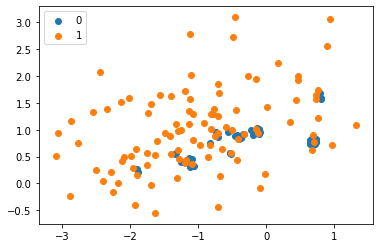

In [6]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Next, we can demonstrate the NearMiss-2 strategy, which is an inverse to NearMiss-1.  It selects examples that are closest to the most distant examples from the minority class, defined by the n_neighbors argument.  This is not an intuitive strategy from the description alone. 

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


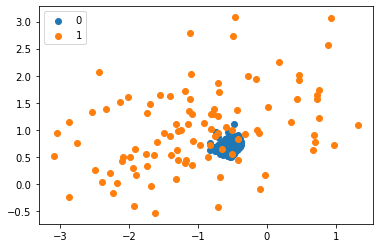

In [7]:
# Undersample imbalanced dataset with NearMiss-2
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Finally, we can try NearMiss-3 that selects the closest examples from the majority class for each minority class.  The n_neighborsver3 argument determines the number of examples to select for each minority example, although the desired balancing ratio set via sampling strategywill filter this so that the desired balance is achieved

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


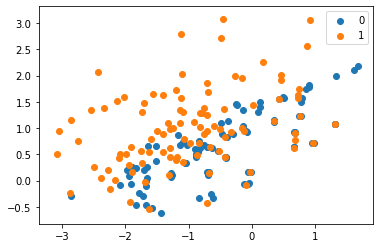

In [8]:
# Undersample imbalanced dataset with NearMiss-3
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

As expected, we can see that each example in the minority class that was in the region of overlap with the majority class has up to three neighbors from the majority class.

###  Condensed Nearest Neighbor Rule Undersampling

Condensed Nearest Neighbors, or CNN for short, is an undersampling technique that seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set. It is achieved by enumerating the examples in the dataset and adding them to the storeonly if they cannot be classified correctly by the current contents of the store. 

We can implement the Condensed Nearest Neighbor for undersampling using the CondensedNearestNeighbour class from the imbalanced-learn library.During the procedure, the KNN algorithm is used to classify points to determine if they are tobe added to the store or not.  The k value is set via the n_neighbors argument and defaults to 1.

Counter({0: 9900, 1: 100})
Counter({0: 187, 1: 100})


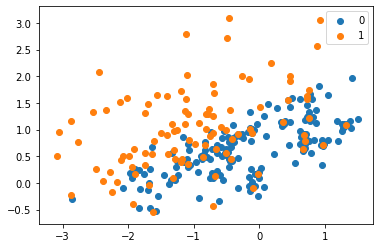

In [9]:
# undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import CondensedNearestNeighbour
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

We can see that the focus of the algorithm is those examples in the minority class along the decision boundary between the two classes,specifically, those majority examples around the minority class examples.

### Methods that Select Examples to Delete

A criticism of the Condensed Nearest Neighbor Rule is that examples are selected randomly,especially initially.  This has the effect of allowing redundant examples into the store and in allowing examples that are internal to the mass of the distribution, rather than on the class boundary, into the store.


